# 데이터 불러오기

In [1]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Mounted at /content/drive
/content/drive/MyDrive/KDT/본 프로젝트


In [3]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [4]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기'],
      dtype='object')

In [5]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [6]:
# 신촌동만 남김
df_sin = df[df.행정동=='신촌동']

# 신촌동에 중분류 업종 중 '주유', '여행', '기술', '정비/수리' 는 18년도에만 매출이 찍혀있으므로, 제외하도록 하자.
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '주유'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '여행'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '기술'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '정비/수리'].index).reset_index().drop('index', axis=1)

# df_sin

In [7]:
# 분기별 업종별 매출금액 합치기

df_sin_quarter = df_sin.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()
df_sin_quarter

<ipython-input-7-aad5d98914bf>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sin_quarter = df_sin.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,서비스,교육,독서실,신촌동,169054586,18,1,0
1,2017-1,서비스,교육,스포츠강습,신촌동,795837623,23,1,0
2,2017-1,서비스,교육,예술학원,신촌동,1162571945,28,1,0
3,2017-1,서비스,교육,외국어학원,신촌동,3196308868,24,2,2
4,2017-1,서비스,교육,일반교습학원,신촌동,762815407,9,1,3
...,...,...,...,...,...,...,...,...,...
1339,2022-4,외식,식사류,패스트푸드점,신촌동,3057584360,83,0,4
1340,2022-4,외식,식사류,한식음식점,신촌동,29617724330,435,8,12
1341,2022-4,외식,주류,호프-간이주점,신촌동,7366806532,171,1,6
1342,2022-4,외식,카페/베이커리,제과점,신촌동,1302230221,48,3,2


# 제과점

In [8]:
# 제과점만 남기기
sin_bread = df_sin_quarter[df_sin_quarter.업종명 == '제과점'].reset_index().drop('index', axis=1)
sin_bread

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,외식,카페/베이커리,제과점,신촌동,2890963931,57,4,5
1,2017-2,외식,카페/베이커리,제과점,신촌동,3052270502,56,2,3
2,2017-3,외식,카페/베이커리,제과점,신촌동,2760302235,53,4,7
3,2017-4,외식,카페/베이커리,제과점,신촌동,2920500543,52,2,3
4,2018-1,외식,카페/베이커리,제과점,신촌동,2564472410,50,1,3
5,2018-2,외식,카페/베이커리,제과점,신촌동,2797392398,50,4,4
6,2018-3,외식,카페/베이커리,제과점,신촌동,2467749806,48,2,4
7,2018-4,외식,카페/베이커리,제과점,신촌동,2777499843,50,4,2
8,2019-1,외식,카페/베이커리,제과점,신촌동,2038967806,49,2,3
9,2019-2,외식,카페/베이커리,제과점,신촌동,1890526954,48,3,2


## 지표 만들기 : 성장성, 시장성, 순점포증감률

In [9]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

sin_bread['성장성'] = sin_bread['분기당_매출_금액'] / sin_bread['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
sin_bread['성장성'][0] = 1

sin_bread

<ipython-input-9-f7ad8d00d66c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_bread['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,외식,카페/베이커리,제과점,신촌동,2890963931,57,4,5,1.000000
1,2017-2,외식,카페/베이커리,제과점,신촌동,3052270502,56,2,3,1.055797
2,2017-3,외식,카페/베이커리,제과점,신촌동,2760302235,53,4,7,0.904344
3,2017-4,외식,카페/베이커리,제과점,신촌동,2920500543,52,2,3,1.058037
4,2018-1,외식,카페/베이커리,제과점,신촌동,2564472410,50,1,3,0.878093
5,2018-2,외식,카페/베이커리,제과점,신촌동,2797392398,50,4,4,1.090826
6,2018-3,외식,카페/베이커리,제과점,신촌동,2467749806,48,2,4,0.882161
7,2018-4,외식,카페/베이커리,제과점,신촌동,2777499843,50,4,2,1.125519
8,2019-1,외식,카페/베이커리,제과점,신촌동,2038967806,49,2,3,0.734102
9,2019-2,외식,카페/베이커리,제과점,신촌동,1890526954,48,3,2,0.927198


In [10]:
# 개업률, 폐업률, 순점포증감률 추가

sin_bread['개업률'] = (sin_bread['개업점포수'] / sin_bread['총 점포수']) * 100
sin_bread['폐업률'] = (sin_bread['폐업점포수'] / sin_bread['총 점포수']) * 100
sin_bread['순점포증감률'] = ((sin_bread['개업점포수'] - sin_bread['폐업점포수']) / sin_bread['총 점포수']) * 100

# sin_bread

In [11]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_seo = df[df['자치구'] == '서대문구']

# 자치구 분기별 업종별 매출금액 합치기
df_seo_quarter = df_seo.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 제과점만 남기기
seo_bread = df_seo_quarter[df_seo_quarter['업종명'] == '제과점'].reset_index()

################################################################################################################################################################################################

sin_bread['시장성'] = (sin_bread['분기당_매출_금액'] / sin_bread['총 점포수']) - (seo_bread['분기당_매출_금액'] / seo_bread['총 점포수'])

sin_bread = sin_bread[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
sin_bread

<ipython-input-11-4539d0060cc7>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_seo_quarter = df_seo.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()


,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,제과점,2890963931,1.000000,-1.754386,-1.512043e+07
1,2017-2,제과점,3052270502,1.055797,-1.785714,-1.346181e+07
2,2017-3,제과점,2760302235,0.904344,-5.660377,-1.253366e+07
3,2017-4,제과점,2920500543,1.058037,-1.923077,-3.922756e+07
4,2018-1,제과점,2564472410,0.878093,-4.000000,-3.748623e+07
5,2018-2,제과점,2797392398,1.090826,0.000000,-3.455381e+07
6,2018-3,제과점,2467749806,0.882161,-4.166667,-3.893855e+07
7,2018-4,제과점,2777499843,1.125519,4.000000,-4.678023e+07
8,2019-1,제과점,2038967806,0.734102,-2.040816,-1.370530e+07
9,2019-2,제과점,1890526954,0.927198,2.083333,-1.497230e+07


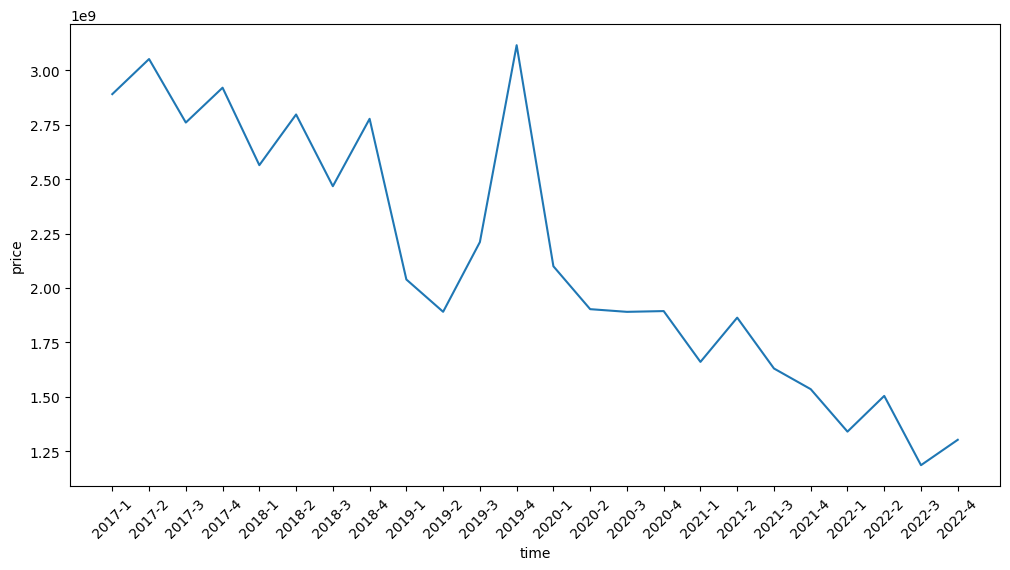

In [12]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x=sin_bread['분기'], y=sin_bread['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [13]:
### X / y 데이터 생성
X = sin_bread[['성장성', '시장성', '순점포증감률']]
y = sin_bread.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.512043e+07 -1.754386
1   1.055797 -1.346181e+07 -1.785714
2   0.904344 -1.253366e+07 -5.660377
3   1.058037 -3.922756e+07 -1.923077
4   0.878093 -3.748623e+07 -4.000000
5   1.090826 -3.455381e+07  0.000000
6   0.882161 -3.893855e+07 -4.166667
7   1.125519 -4.678023e+07  4.000000
8   0.734102 -1.370530e+07 -2.040816
9   0.927198 -1.497230e+07  2.083333
10  1.169473 -4.559885e+06 -6.976744
11  1.409348 -3.738650e+06 -2.173913
12  0.673859 -1.322979e+07 -2.380952
13  0.906127 -1.683951e+07  0.000000
14  0.993521 -1.691733e+07 -7.692308
15  1.001847 -1.765891e+07  2.500000
16  0.876661 -1.811092e+07  4.761905
17  1.122519 -1.715825e+07 -2.380952
18  0.874612 -2.050279e+07  2.380952
19  0.941678 -2.224422e+07  4.347826
20  0.872875 -2.624218e+07 -2.222222
21  1.122557 -2.358745e+07  0.000000
22  0.788290 -2.537408e+07  2.127660
23  1.098423 -2.479630e+07  2.083333
---------------------------------------------------------------------------

In [14]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [15]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [16]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [17]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.15558473 0.49733652 0.78848561]
 [0.57725351 0.51076026 0.78492647]]


In [18]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [19]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [20]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size = 256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.5823
Epoch 1: val_loss improved from inf to 0.14231, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.5823 - val_loss: 0.1423
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.5652
Epoch 2: val_loss improved from 0.14231 to 0.13286, saving model to stock_model.h5
1/1 [==============================] - 0s 106ms/step - loss: 0.5652 - val_loss: 0.1329
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.5487
Epoch 3: val_loss improved from 0.13286 to 0.12388, saving model to stock_model.h5
1/1 [==============================] - 0s 131ms/step - loss: 0.5487 - val_loss: 0.1239
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.5327
Epoch 4: val_loss improved from 0.12388 to 0.11534, saving model to stock_model.h5
1/1 [==============================] - 0s 105ms/step - loss: 0.5327 - val_loss: 0.1153
Epoch 5/100
1/1 [==============

In [21]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 838ms/step
[[0.34507897]
 [0.3649171 ]
 [0.34871933]
 [0.3086855 ]
 [0.34543127]]


In [22]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_bread.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2021-4,0.180959,0.345079
2022-1,0.079882,0.364917
2022-2,0.164939,0.348719
2022-3,0.000000,0.308686
2022-4,0.060445,0.345431


In [23]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_bread.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_bread의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2021-4,0.180959,0.345079,1534869925,1.851690e+09,-316819675.0
2022-1,0.079882,0.364917,1339749913,1.889985e+09,-550235367.0
2022-2,0.164939,0.348719,1503945868,1.858717e+09,-354771060.0
2022-3,0.000000,0.308686,1185545708,1.781435e+09,-595889556.0
2022-4,0.060445,0.345431,1302230221,1.852370e+09,-550139443.0


### 결과

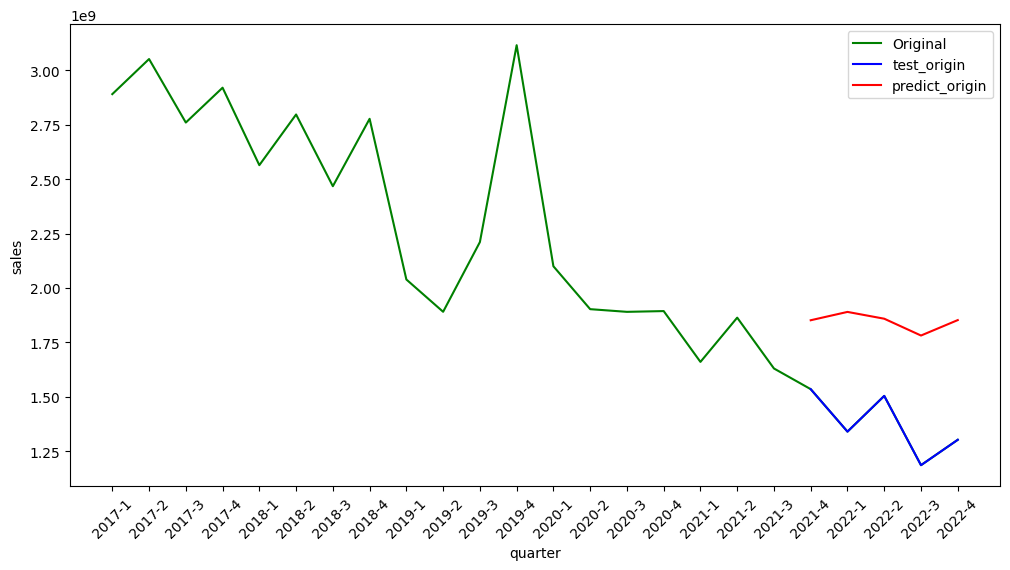

In [24]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_bread['분기'], sin_bread['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [25]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean    -4.735710e+08
std      1.278538e+08
min     -5.958896e+08
25%     -5.502354e+08
50%     -5.501394e+08
75%     -3.547711e+08
max     -3.168197e+08
dtype: float64

In [26]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 22ms/step
[[0.34358585]]
--------------------------------------------------------------------------------
예측된 매출  : 1848807296.0 


## 23년 1분기 성장성 예측

In [27]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_bread[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_bread.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

     분기당_매출_금액           시장성    순점포증감률
0   2890963931 -1.512043e+07 -1.754386
1   3052270502 -1.346181e+07 -1.785714
2   2760302235 -1.253366e+07 -5.660377
3   2920500543 -3.922756e+07 -1.923077
4   2564472410 -3.748623e+07 -4.000000
5   2797392398 -3.455381e+07  0.000000
6   2467749806 -3.893855e+07 -4.166667
7   2777499843 -4.678023e+07  4.000000
8   2038967806 -1.370530e+07 -2.040816
9   1890526954 -1.497230e+07  2.083333
10  2210920333 -4.559885e+06 -6.976744
11  3115955543 -3.738650e+06 -2.173913
12  2099715919 -1.322979e+07 -2.380952
13  1902609558 -1.683951e+07  0.000000
14  1890282000 -1.691733e+07 -7.692308
15  1893773509 -1.765891e+07  2.500000
16  1660197037 -1.811092e+07  4.761905
17  1863602912 -1.715825e+07 -2.380952
18  1629930115 -2.050279e+07  2.380952
19  1534869925 -2.224422e+07  4.347826
20  1339749913 -2.624218e+07 -2.222222
21  1503945868 -2.358745e+07  0.000000
22  1185545708 -2.537408e+07  2.127660
23  1302230221 -2.479630e+07  2.083333
-------------------------

In [28]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [29]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [30]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.         0.49733652 0.78848561]
 [0.06044546 0.51076026 0.78492647]]


In [31]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [32]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [33]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size = 256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3114
Epoch 1: val_loss improved from inf to 0.16119, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.3114 - val_loss: 0.1612
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2986
Epoch 2: val_loss improved from 0.16119 to 0.15195, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.2986 - val_loss: 0.1519
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2863
Epoch 3: val_loss improved from 0.15195 to 0.14317, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.2863 - val_loss: 0.1432
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2745
Epoch 4: val_loss improved from 0.14317 to 0.13484, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.2745 - val_loss: 0.1348
Epoch 5/100
1/1 [=================

In [34]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.30273947]
 [0.32633474]
 [0.30094907]
 [0.25609374]
 [0.28149757]]


In [35]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_bread.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2021-4,0.364138,0.302739
2022-1,0.270590,0.326335
2022-2,0.610068,0.300949
2022-3,0.155585,0.256094
2022-4,0.577254,0.281498


In [36]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_bread.iloc[-len(pred):, 3].values       # 성장성이 sin_bread의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2021-4,0.364138,0.302739,0.941678,0.896521,0.045158
2022-1,0.270590,0.326335,0.872875,0.913875,-0.041000
2022-2,0.610068,0.300949,1.122557,0.895204,0.227353
2022-3,0.155585,0.256094,0.788290,0.862213,-0.073923
2022-4,0.577254,0.281498,1.098423,0.880898,0.217525


### 결과

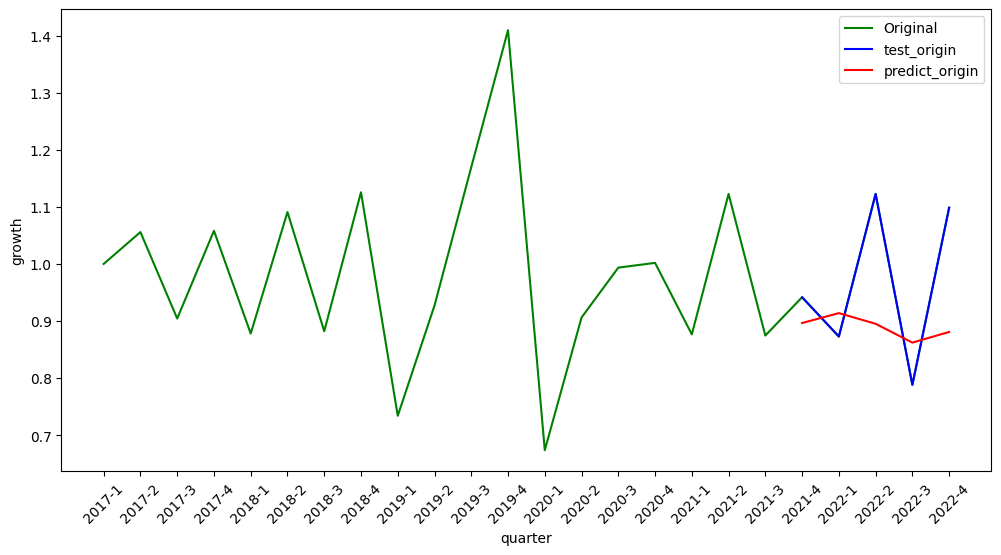

In [37]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_bread['분기'], sin_bread['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [38]:
## error의 요약 통계량
error.describe()

count    5.000000
mean     0.075023
std      0.141465
min     -0.073923
25%     -0.041000
50%      0.045158
75%      0.217525
max      0.227353
dtype: float64

In [39]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 23ms/step
[[0.28333357]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.8822479248046875 


## 23년 1분기 시장성 예측

In [40]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_bread[['성장성', '분기당_매출_금액', '순점포증감률']]
y = sin_bread.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액    순점포증감률
0   1.000000  2890963931 -1.754386
1   1.055797  3052270502 -1.785714
2   0.904344  2760302235 -5.660377
3   1.058037  2920500543 -1.923077
4   0.878093  2564472410 -4.000000
5   1.090826  2797392398  0.000000
6   0.882161  2467749806 -4.166667
7   1.125519  2777499843  4.000000
8   0.734102  2038967806 -2.040816
9   0.927198  1890526954  2.083333
10  1.169473  2210920333 -6.976744
11  1.409348  3115955543 -2.173913
12  0.673859  2099715919 -2.380952
13  0.906127  1902609558  0.000000
14  0.993521  1890282000 -7.692308
15  1.001847  1893773509  2.500000
16  0.876661  1660197037  4.761905
17  1.122519  1863602912 -2.380952
18  0.874612  1629930115  2.380952
19  0.941678  1534869925  4.347826
20  0.872875  1339749913 -2.222222
21  1.122557  1503945868  0.000000
22  0.788290  1185545708  2.127660
23  1.098423  1302230221  2.083333
--------------------------------------------------------------------------------
             시장성
0  -1.512043e+07
1  -1.3461

In [41]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [42]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [43]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.15558473 0.         0.78848561]
 [0.57725351 0.06044546 0.78492647]]


In [44]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [45]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [46]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size = 256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4286
Epoch 1: val_loss improved from inf to 0.49594, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.4286 - val_loss: 0.4959
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4149
Epoch 2: val_loss improved from 0.49594 to 0.48000, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.4149 - val_loss: 0.4800
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4018
Epoch 3: val_loss improved from 0.48000 to 0.46454, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.4018 - val_loss: 0.4645
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3891
Epoch 4: val_loss improved from 0.46454 to 0.44948, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.3891 - val_loss: 0.4495
Epoch 5/100
1/1 [=================

In [47]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.5528326 ]
 [0.5995756 ]
 [0.56833   ]
 [0.47606233]
 [0.54581374]]


In [48]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_bread.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2021-4,0.570054,0.552833
2022-1,0.477168,0.599576
2022-2,0.538846,0.568330
2022-3,0.497337,0.476062
2022-4,0.510760,0.545814


In [49]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_bread.iloc[-len(pred):, 5].values       # 시장성이 sin_bread의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2021-4,0.570054,0.552833,-2.224422e+07,-22985440.0,7.412165e+05
2022-1,0.477168,0.599576,-2.624218e+07,-20973548.0,-5.268636e+06
2022-2,0.538846,0.568330,-2.358745e+07,-22318408.0,-1.269043e+06
2022-3,0.497337,0.476062,-2.537408e+07,-26289752.0,9.156733e+05
2022-4,0.510760,0.545814,-2.479630e+07,-23287544.0,-1.508756e+06


### 결과

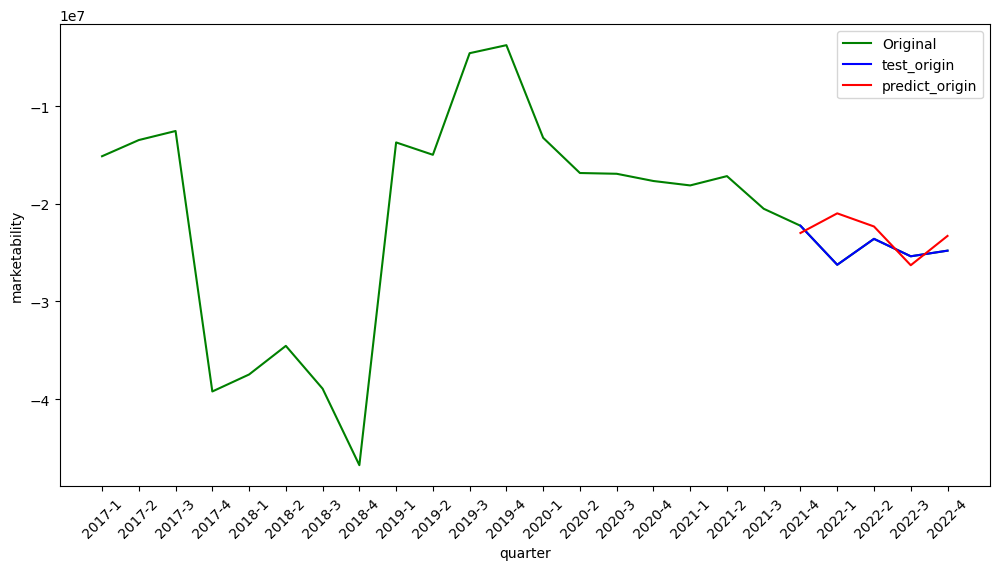

In [50]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_bread['분기'], sin_bread['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [51]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean    -1.277909e+06
std      2.493388e+06
min     -5.268636e+06
25%     -1.508756e+06
50%     -1.269043e+06
75%      7.412165e+05
max      9.156733e+05
dtype: float64

In [52]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 32ms/step
[[0.5364618]]
--------------------------------------------------------------------------------
예측된 시장성  : -23690066.0 


## 23년 1분기 순점포증감률 예측

In [53]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 시장성 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_bread[['성장성', '분기당_매출_금액', '시장성']]
y = sin_bread.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액           시장성
0   1.000000  2890963931 -1.512043e+07
1   1.055797  3052270502 -1.346181e+07
2   0.904344  2760302235 -1.253366e+07
3   1.058037  2920500543 -3.922756e+07
4   0.878093  2564472410 -3.748623e+07
5   1.090826  2797392398 -3.455381e+07
6   0.882161  2467749806 -3.893855e+07
7   1.125519  2777499843 -4.678023e+07
8   0.734102  2038967806 -1.370530e+07
9   0.927198  1890526954 -1.497230e+07
10  1.169473  2210920333 -4.559885e+06
11  1.409348  3115955543 -3.738650e+06
12  0.673859  2099715919 -1.322979e+07
13  0.906127  1902609558 -1.683951e+07
14  0.993521  1890282000 -1.691733e+07
15  1.001847  1893773509 -1.765891e+07
16  0.876661  1660197037 -1.811092e+07
17  1.122519  1863602912 -1.715825e+07
18  0.874612  1629930115 -2.050279e+07
19  0.941678  1534869925 -2.224422e+07
20  0.872875  1339749913 -2.624218e+07
21  1.122557  1503945868 -2.358745e+07
22  0.788290  1185545708 -2.537408e+07
23  1.098423  1302230221 -2.479630e+07
-------------------------

In [54]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [55]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [56]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.15558473 0.         0.49733652]
 [0.57725351 0.06044546 0.51076026]]


In [57]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (17, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (17, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (17, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [58]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [59]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size = 256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3037
Epoch 1: val_loss improved from inf to 0.45713, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.3037 - val_loss: 0.4571
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2915
Epoch 2: val_loss improved from 0.45713 to 0.44258, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.2915 - val_loss: 0.4426
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2799
Epoch 3: val_loss improved from 0.44258 to 0.42856, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.2799 - val_loss: 0.4286
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2687
Epoch 4: val_loss improved from 0.42856 to 0.41502, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.2687 - val_loss: 0.4150
Epoch 5/100
1/1 [=================

In [60]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.45592374]
 [0.3924488 ]
 [0.37372512]
 [0.36636353]
 [0.38349456]]


In [61]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_bread.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2021-4,0.966752,0.455924
2022-1,0.439216,0.392449
2022-2,0.617647,0.373725
2022-3,0.788486,0.366364
2022-4,0.784926,0.383495


In [62]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_bread.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_bread의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2021-4,0.966752,0.455924,4.347826,-2.014137,6.361963
2022-1,0.439216,0.392449,-2.222222,-2.804667,0.582445
2022-2,0.617647,0.373725,0.000000,-3.037856,3.037856
2022-3,0.788486,0.366364,2.127660,-3.129539,5.257198
2022-4,0.784926,0.383495,2.083333,-2.916185,4.999518


### 결과

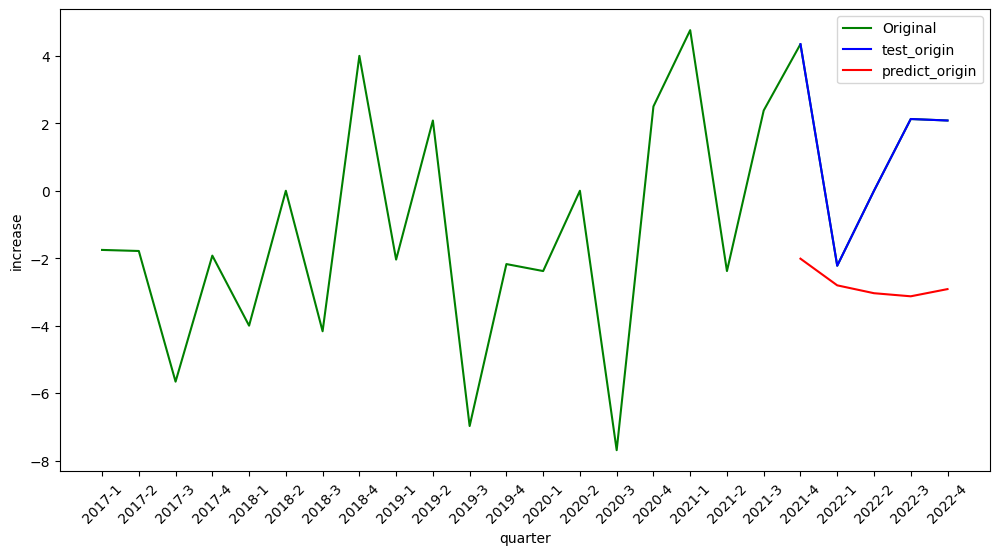

In [63]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_bread['분기'], sin_bread['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [64]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     4.047796
std      2.277742
min      0.582445
25%      3.037856
50%      4.999518
75%      5.257198
max      6.361963
dtype: float64

In [65]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 35ms/step
[[0.33331683]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -3.5411088466644287 


## 원본 데이터에 예측값 추가하기

In [66]:
print(sales)
print(growth)
print(marketability)
print(increase)

1848807300.0
0.8822479
-23690066.0
-3.5411088


In [67]:
sin_bread.loc[24] = ['2023-1', '제과점', sales, growth, increase, marketability]

<ipython-input-67-e2a897ff26cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_bread.loc[24] = ['2023-1', '제과점', sales, growth, increase, marketability]


In [68]:
sin_bread

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,제과점,2.890964e+09,1.000000,-1.754386,-1.512043e+07
1,2017-2,제과점,3.052271e+09,1.055797,-1.785714,-1.346181e+07
2,2017-3,제과점,2.760302e+09,0.904344,-5.660377,-1.253366e+07
3,2017-4,제과점,2.920501e+09,1.058037,-1.923077,-3.922756e+07
4,2018-1,제과점,2.564472e+09,0.878093,-4.000000,-3.748623e+07
5,2018-2,제과점,2.797392e+09,1.090826,0.000000,-3.455381e+07
6,2018-3,제과점,2.467750e+09,0.882161,-4.166667,-3.893855e+07
7,2018-4,제과점,2.777500e+09,1.125519,4.000000,-4.678023e+07
8,2019-1,제과점,2.038968e+09,0.734102,-2.040816,-1.370530e+07
9,2019-2,제과점,1.890527e+09,0.927198,2.083333,-1.497230e+07


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [69]:
################ 매출 ####################

# 총 매출액을 예측하기 위한 지표로는 성장성, 시장성, 순점포증감률 선정.

### X / y 데이터 생성
X = sin_bread[['성장성', '시장성', '순점포증감률']]
y = sin_bread.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.512043e+07 -1.754386
1   1.055797 -1.346181e+07 -1.785714
2   0.904344 -1.253366e+07 -5.660377
3   1.058037 -3.922756e+07 -1.923077
4   0.878093 -3.748623e+07 -4.000000
5   1.090826 -3.455381e+07  0.000000
6   0.882161 -3.893855e+07 -4.166667
7   1.125519 -4.678023e+07  4.000000
8   0.734102 -1.370530e+07 -2.040816
9   0.927198 -1.497230e+07  2.083333
10  1.169473 -4.559885e+06 -6.976744
11  1.409348 -3.738650e+06 -2.173913
12  0.673859 -1.322979e+07 -2.380952
13  0.906127 -1.683951e+07  0.000000
14  0.993521 -1.691733e+07 -7.692308
15  1.001847 -1.765891e+07  2.500000
16  0.876661 -1.811092e+07  4.761905
17  1.122519 -1.715825e+07 -2.380952
18  0.874612 -2.050279e+07  2.380952
19  0.941678 -2.224422e+07  4.347826
20  0.872875 -2.624218e+07 -2.222222
21  1.122557 -2.358745e+07  0.000000
22  0.788290 -2.537408e+07  2.127660
23  1.098423 -2.479630e+07  2.083333
24  0.882248 -2.369007e+07 -3.541109
--------------------------------------

In [70]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [71]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.57725351 0.51076026 0.78492647]
 [0.28333356 0.53646178 0.33331685]]


In [72]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [73]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [74]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size = 256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.5823
Epoch 1: val_loss improved from inf to 0.12965, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.5823 - val_loss: 0.1296
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.5652
Epoch 2: val_loss improved from 0.12965 to 0.12074, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.5652 - val_loss: 0.1207
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.5487
Epoch 3: val_loss improved from 0.12074 to 0.11230, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.5487 - val_loss: 0.1123
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.5327
Epoch 4: val_loss improved from 0.11230 to 0.10429, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.5327 - val_loss: 0.1043
Epoch 5/100
1/1 [=================

In [75]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.33928654]
 [0.32411018]
 [0.287502  ]
 [0.32125774]
 [0.3197295 ]]


In [76]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_bread.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.079882,0.339287
2022-2,0.164939,0.324110
2022-3,0.000000,0.287502
2022-4,0.060445,0.321258
2023-1,0.343586,0.319730


In [77]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_bread.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_bread의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.079882,0.339287,1.339750e+09,1.840508e+09,-500757863.0
2022-2,0.164939,0.324110,1.503946e+09,1.811211e+09,-307265268.0
2022-3,0.000000,0.287502,1.185546e+09,1.740542e+09,-554996756.0
2022-4,0.060445,0.321258,1.302230e+09,1.805705e+09,-503474611.0
2023-1,0.343586,0.319730,1.848807e+09,1.802755e+09,46052608.0


In [78]:
df_test = df_test.reset_index()

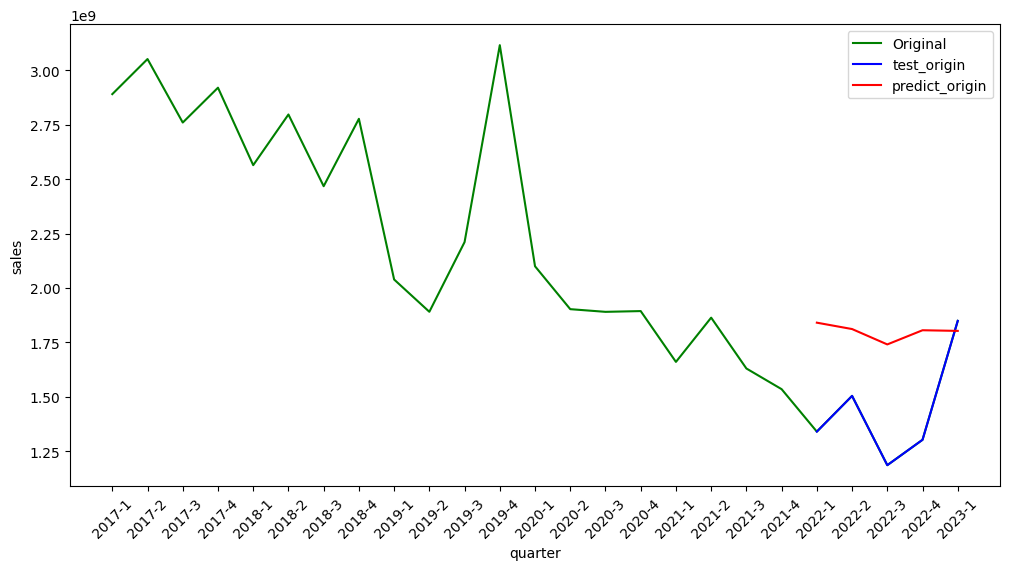

In [79]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_bread['분기'], sin_bread['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [80]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean    -3.640884e+08
std      2.479907e+08
min     -5.549968e+08
25%     -5.034746e+08
50%     -5.007579e+08
75%     -3.072653e+08
max      4.605261e+07
dtype: float64

In [81]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 39ms/step
[[0.31509092]]
--------------------------------------------------------------------------------
예측된 매출  : 1793800320.0 


### 성장성

In [82]:
### X / y 데이터 생성
X = sin_bread[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_bread.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   2.890964e+09 -1.512043e+07 -1.754386
1   3.052271e+09 -1.346181e+07 -1.785714
2   2.760302e+09 -1.253366e+07 -5.660377
3   2.920501e+09 -3.922756e+07 -1.923077
4   2.564472e+09 -3.748623e+07 -4.000000
5   2.797392e+09 -3.455381e+07  0.000000
6   2.467750e+09 -3.893855e+07 -4.166667
7   2.777500e+09 -4.678023e+07  4.000000
8   2.038968e+09 -1.370530e+07 -2.040816
9   1.890527e+09 -1.497230e+07  2.083333
10  2.210920e+09 -4.559885e+06 -6.976744
11  3.115956e+09 -3.738650e+06 -2.173913
12  2.099716e+09 -1.322979e+07 -2.380952
13  1.902610e+09 -1.683951e+07  0.000000
14  1.890282e+09 -1.691733e+07 -7.692308
15  1.893774e+09 -1.765891e+07  2.500000
16  1.660197e+09 -1.811092e+07  4.761905
17  1.863603e+09 -1.715825e+07 -2.380952
18  1.629930e+09 -2.050279e+07  2.380952
19  1.534870e+09 -2.224422e+07  4.347826
20  1.339750e+09 -2.624218e+07 -2.222222
21  1.503946e+09 -2.358745e+07  0.000000
22  1.185546e+09 -2.537408e+07  2.127660
23  1.302230e+09

In [83]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [84]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.06044546 0.51076026 0.78492647]
 [0.34358589 0.53646178 0.33331685]]


In [85]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [86]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [87]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size = 256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.3114
Epoch 1: val_loss improved from inf to 0.15962, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.3114 - val_loss: 0.1596
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2986
Epoch 2: val_loss improved from 0.15962 to 0.15038, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.2986 - val_loss: 0.1504
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2863
Epoch 3: val_loss improved from 0.15038 to 0.14160, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.2863 - val_loss: 0.1416
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2745
Epoch 4: val_loss improved from 0.14160 to 0.13325, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.2745 - val_loss: 0.1332
Epoch 5/100
1/1 [=================

In [88]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.34812805]
 [0.3210534 ]
 [0.27257833]
 [0.29991892]
 [0.30186006]]


In [89]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_bread.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.270590,0.348128
2022-2,0.610068,0.321053
2022-3,0.155585,0.272578
2022-4,0.577254,0.299919
2023-1,0.283334,0.301860


In [90]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_bread.iloc[-len(pred):, 3].values       # 성장성이 sin_bread의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.270590,0.348128,0.872875,0.929904,-0.057028
2022-2,0.610068,0.321053,1.122557,0.909990,0.212567
2022-3,0.155585,0.272578,0.788290,0.874338,-0.086047
2022-4,0.577254,0.299919,1.098423,0.894446,0.203976
2023-1,0.283334,0.301860,0.882248,0.895874,-0.013626


In [91]:
df_test = df_test.reset_index()

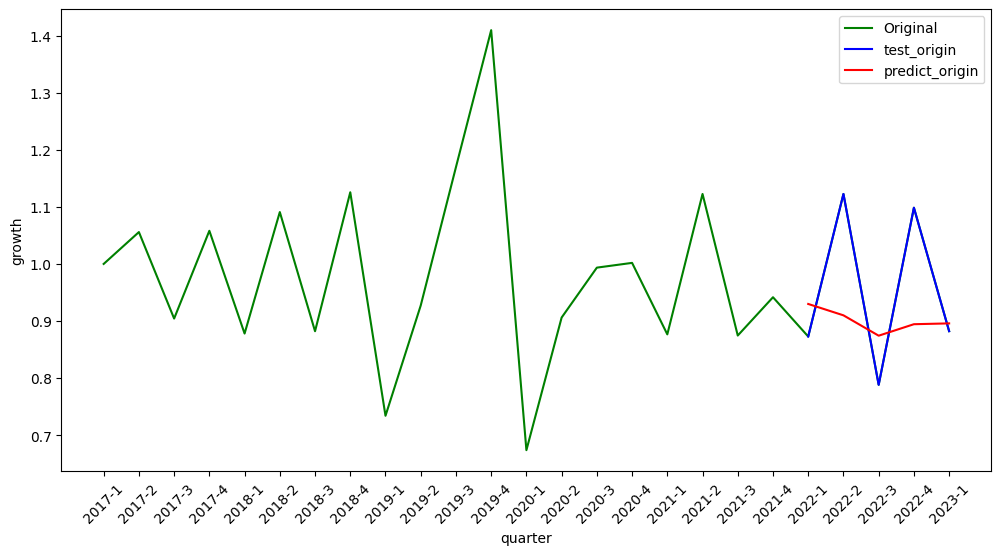

In [92]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_bread['분기'], sin_bread['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [93]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     0.051968
std      0.145025
min     -0.086047
25%     -0.057028
50%     -0.013626
75%      0.203976
max      0.212567
dtype: float64

In [94]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 23ms/step
[[0.29889882]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.8936960101127625 


### 시장성

In [95]:
### X / y 데이터 생성
X = sin_bread[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_bread.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   2.890964e+09  1.000000 -1.754386
1   3.052271e+09  1.055797 -1.785714
2   2.760302e+09  0.904344 -5.660377
3   2.920501e+09  1.058037 -1.923077
4   2.564472e+09  0.878093 -4.000000
5   2.797392e+09  1.090826  0.000000
6   2.467750e+09  0.882161 -4.166667
7   2.777500e+09  1.125519  4.000000
8   2.038968e+09  0.734102 -2.040816
9   1.890527e+09  0.927198  2.083333
10  2.210920e+09  1.169473 -6.976744
11  3.115956e+09  1.409348 -2.173913
12  2.099716e+09  0.673859 -2.380952
13  1.902610e+09  0.906127  0.000000
14  1.890282e+09  0.993521 -7.692308
15  1.893774e+09  1.001847  2.500000
16  1.660197e+09  0.876661  4.761905
17  1.863603e+09  1.122519 -2.380952
18  1.629930e+09  0.874612  2.380952
19  1.534870e+09  0.941678  4.347826
20  1.339750e+09  0.872875 -2.222222
21  1.503946e+09  1.122557  0.000000
22  1.185546e+09  0.788290  2.127660
23  1.302230e+09  1.098423  2.083333
24  1.848807e+09  0.882248 -3.541109
--------------------------------------

In [96]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [97]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.06044546 0.57725351 0.78492647]
 [0.34358589 0.28333356 0.33331685]]


In [98]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [99]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [100]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size = 256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4193
Epoch 1: val_loss improved from inf to 0.47564, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.4193 - val_loss: 0.4756
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4060
Epoch 2: val_loss improved from 0.47564 to 0.45990, saving model to stock_model.h5
1/1 [==============================] - 0s 105ms/step - loss: 0.4060 - val_loss: 0.4599
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.3931
Epoch 3: val_loss improved from 0.45990 to 0.44456, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.3931 - val_loss: 0.4446
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.3807
Epoch 4: val_loss improved from 0.44456 to 0.42959, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.3807 - val_loss: 0.4296
Epoch 5/100
1/1 [================

In [101]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.58882153]
 [0.5540725 ]
 [0.45712975]
 [0.5236808 ]
 [0.5195467 ]]


In [102]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_bread.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.477168,0.588822
2022-2,0.538846,0.554072
2022-3,0.497337,0.457130
2022-4,0.510760,0.523681
2023-1,0.536462,0.519547


In [103]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_bread.iloc[-len(pred):, 5].values       # 시장성이 sin_bread의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.477168,0.588822,-2.624218e+07,-21436420.0,-4.805764e+06
2022-2,0.538846,0.554072,-2.358745e+07,-22932074.0,-6.553775e+05
2022-3,0.497337,0.457130,-2.537408e+07,-27104640.0,1.730561e+06
2022-4,0.510760,0.523681,-2.479630e+07,-24240180.0,-5.561198e+05
2023-1,0.536462,0.519547,-2.369007e+07,-24418118.0,7.280520e+05


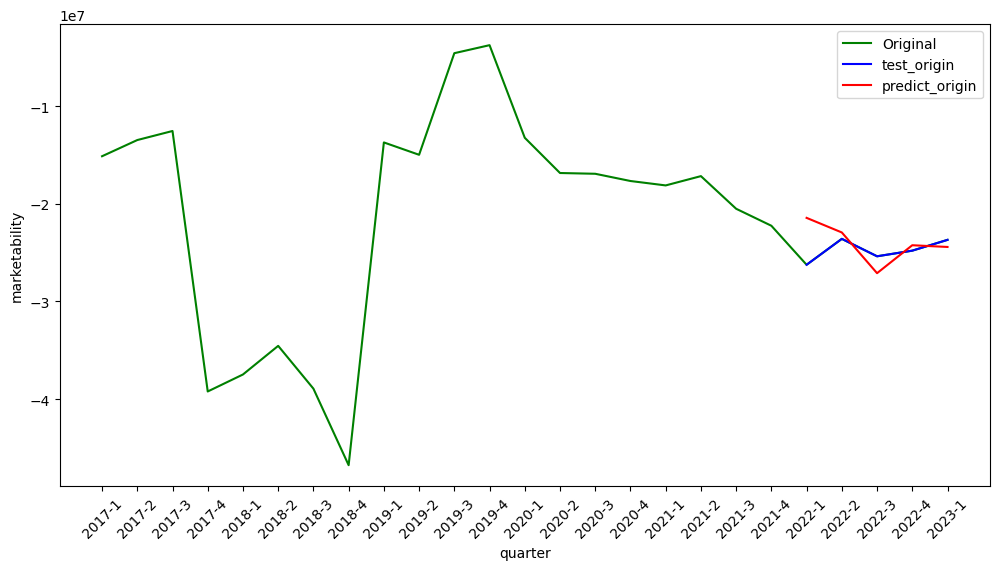

In [104]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_bread['분기'], sin_bread['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [105]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean    -7.117296e+05
std      2.491298e+06
min     -4.805764e+06
25%     -6.553775e+05
50%     -5.561198e+05
75%      7.280520e+05
max      1.730561e+06
dtype: float64

In [106]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 23ms/step
[[0.52321494]]
--------------------------------------------------------------------------------
예측된 시장성  : -24260232.0 


### 순점포증감률

In [107]:
### X / y 데이터 생성
X = sin_bread[['분기당_매출_금액', '성장성', '시장성']]
y = sin_bread.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   2.890964e+09  1.000000 -1.512043e+07
1   3.052271e+09  1.055797 -1.346181e+07
2   2.760302e+09  0.904344 -1.253366e+07
3   2.920501e+09  1.058037 -3.922756e+07
4   2.564472e+09  0.878093 -3.748623e+07
5   2.797392e+09  1.090826 -3.455381e+07
6   2.467750e+09  0.882161 -3.893855e+07
7   2.777500e+09  1.125519 -4.678023e+07
8   2.038968e+09  0.734102 -1.370530e+07
9   1.890527e+09  0.927198 -1.497230e+07
10  2.210920e+09  1.169473 -4.559885e+06
11  3.115956e+09  1.409348 -3.738650e+06
12  2.099716e+09  0.673859 -1.322979e+07
13  1.902610e+09  0.906127 -1.683951e+07
14  1.890282e+09  0.993521 -1.691733e+07
15  1.893774e+09  1.001847 -1.765891e+07
16  1.660197e+09  0.876661 -1.811092e+07
17  1.863603e+09  1.122519 -1.715825e+07
18  1.629930e+09  0.874612 -2.050279e+07
19  1.534870e+09  0.941678 -2.224422e+07
20  1.339750e+09  0.872875 -2.624218e+07
21  1.503946e+09  1.122557 -2.358745e+07
22  1.185546e+09  0.788290 -2.537408e+07
23  1.302230e+09

In [108]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [109]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.06044546 0.57725351 0.51076026]
 [0.34358589 0.28333356 0.53646178]]


In [110]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [111]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [112]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size = 256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2937
Epoch 1: val_loss improved from inf to 0.52187, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2937 - val_loss: 0.5219
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2820
Epoch 2: val_loss improved from 0.52187 to 0.50664, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.2820 - val_loss: 0.5066
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2707
Epoch 3: val_loss improved from 0.50664 to 0.49199, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.2707 - val_loss: 0.4920
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2600
Epoch 4: val_loss improved from 0.49199 to 0.47790, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.2600 - val_loss: 0.4779
Epoch 5/100
1/1 [=================

In [113]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.3636443 ]
 [0.34071097]
 [0.32907984]
 [0.34045503]
 [0.29617596]]


In [114]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_bread.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.439216,0.363644
2022-2,0.617647,0.340711
2022-3,0.788486,0.329080
2022-4,0.784926,0.340455
2023-1,0.333317,0.296176


In [115]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_bread.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_bread의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.439216,0.363644,-2.222222,-3.163404,0.941182
2022-2,0.617647,0.340711,0.000000,-3.449021,3.449021
2022-3,0.788486,0.329080,2.127660,-3.593877,5.721537
2022-4,0.784926,0.340455,2.083333,-3.452208,5.535542
2023-1,0.333317,0.296176,-3.541109,-4.003669,0.462560


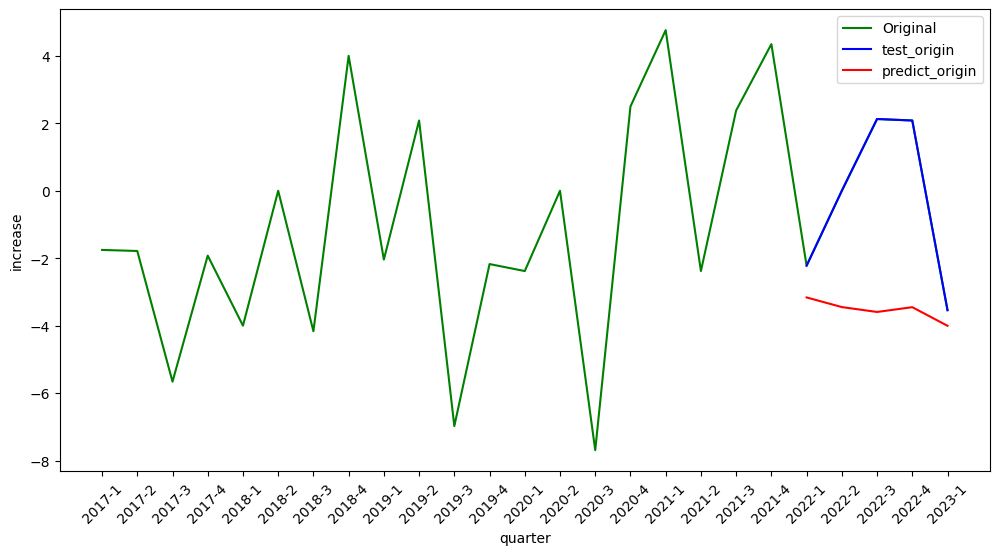

In [116]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_bread['분기'], sin_bread['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [117]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     3.221968
std      2.473274
min      0.462560
25%      0.941182
50%      3.449021
75%      5.535542
max      5.721537
dtype: float64

In [118]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 38ms/step
[[0.35398847]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -3.2836599349975586 


### 추가


In [119]:
sin_bread.loc[25] = ['2023-2', '제과점', sales, growth, increase, marketability]

<ipython-input-119-69535ebd6b55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_bread.loc[25] = ['2023-2', '제과점', sales, growth, increase, marketability]


In [120]:
sin_bread

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,제과점,2.890964e+09,1.000000,-1.754386,-1.512043e+07
1,2017-2,제과점,3.052271e+09,1.055797,-1.785714,-1.346181e+07
2,2017-3,제과점,2.760302e+09,0.904344,-5.660377,-1.253366e+07
3,2017-4,제과점,2.920501e+09,1.058037,-1.923077,-3.922756e+07
4,2018-1,제과점,2.564472e+09,0.878093,-4.000000,-3.748623e+07
5,2018-2,제과점,2.797392e+09,1.090826,0.000000,-3.455381e+07
6,2018-3,제과점,2.467750e+09,0.882161,-4.166667,-3.893855e+07
7,2018-4,제과점,2.777500e+09,1.125519,4.000000,-4.678023e+07
8,2019-1,제과점,2.038968e+09,0.734102,-2.040816,-1.370530e+07
9,2019-2,제과점,1.890527e+09,0.927198,2.083333,-1.497230e+07


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [121]:
################ 매출 ####################

### X / y 데이터 생성
X = sin_bread[['성장성', '시장성', '순점포증감률']]
y = sin_bread.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.512043e+07 -1.754386
1   1.055797 -1.346181e+07 -1.785714
2   0.904344 -1.253366e+07 -5.660377
3   1.058037 -3.922756e+07 -1.923077
4   0.878093 -3.748623e+07 -4.000000
5   1.090826 -3.455381e+07  0.000000
6   0.882161 -3.893855e+07 -4.166667
7   1.125519 -4.678023e+07  4.000000
8   0.734102 -1.370530e+07 -2.040816
9   0.927198 -1.497230e+07  2.083333
10  1.169473 -4.559885e+06 -6.976744
11  1.409348 -3.738650e+06 -2.173913
12  0.673859 -1.322979e+07 -2.380952
13  0.906127 -1.683951e+07  0.000000
14  0.993521 -1.691733e+07 -7.692308
15  1.001847 -1.765891e+07  2.500000
16  0.876661 -1.811092e+07  4.761905
17  1.122519 -1.715825e+07 -2.380952
18  0.874612 -2.050279e+07  2.380952
19  0.941678 -2.224422e+07  4.347826
20  0.872875 -2.624218e+07 -2.222222
21  1.122557 -2.358745e+07  0.000000
22  0.788290 -2.537408e+07  2.127660
23  1.098423 -2.479630e+07  2.083333
24  0.882248 -2.369007e+07 -3.541109
25  0.893696 -2.426023e+07 -3.283660
-

In [122]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [123]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.28333356 0.53646178 0.33331685]
 [0.29889885 0.52321491 0.35398848]]


In [124]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [125]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [126]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size = 256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.5539
Epoch 1: val_loss improved from inf to 0.09895, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.5539 - val_loss: 0.0989
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.5371
Epoch 2: val_loss improved from 0.09895 to 0.09147, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.5371 - val_loss: 0.0915
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.5208
Epoch 3: val_loss improved from 0.09147 to 0.08444, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.5208 - val_loss: 0.0844
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.5051
Epoch 4: val_loss improved from 0.08444 to 0.07781, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.5051 - val_loss: 0.0778
Epoch 5/100
1/1 [=================

In [127]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 783ms/step
[[0.27387097]
 [0.24573699]
 [0.27282593]
 [0.2706356 ]
 [0.26766798]]


In [128]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_bread.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.164939,0.273871
2022-3,0.000000,0.245737
2022-4,0.060445,0.272826
2023-1,0.343586,0.270636
2023-2,0.315091,0.267668


In [129]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_bread.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_bread의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.164939,0.273871,1.503946e+09,1.714229e+09,-210282996.0
2022-3,0.000000,0.245737,1.185546e+09,1.659919e+09,-474373140.0
2022-4,0.060445,0.272826,1.302230e+09,1.712212e+09,-409981363.0
2023-1,0.343586,0.270636,1.848807e+09,1.707983e+09,140823936.0
2023-2,0.315091,0.267668,1.793800e+09,1.702255e+09,91545728.0


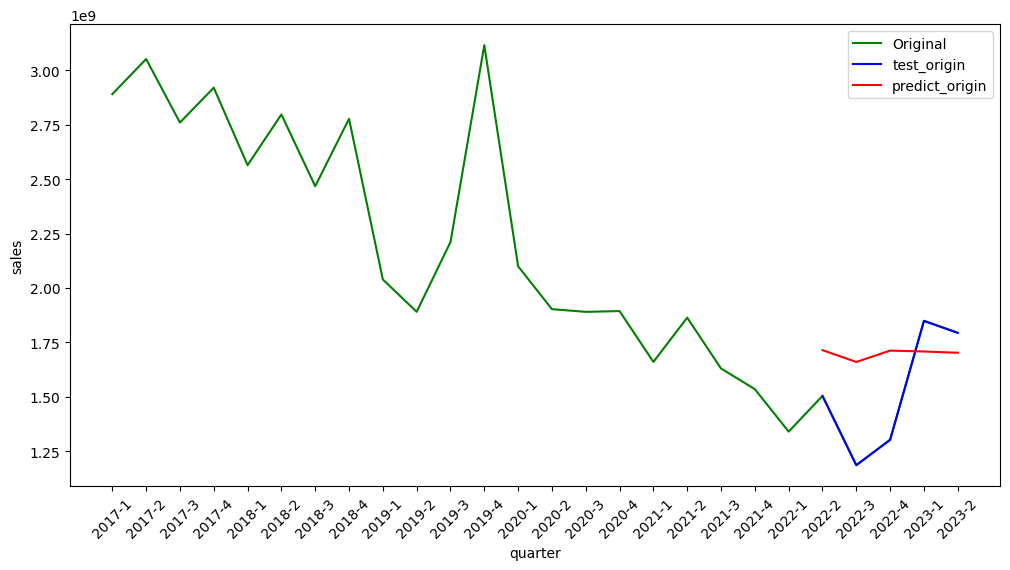

In [130]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_bread['분기'], sin_bread['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [131]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean    -1.724536e+08
std      2.814447e+08
min     -4.743731e+08
25%     -4.099814e+08
50%     -2.102830e+08
75%      9.154573e+07
max      1.408239e+08
dtype: float64

In [132]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 23ms/step
[[0.22033864]]
--------------------------------------------------------------------------------
예측된 매출  : 1610889600.0 


### 성장성

In [133]:
X = sin_bread[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_bread.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   2.890964e+09 -1.512043e+07 -1.754386
1   3.052271e+09 -1.346181e+07 -1.785714
2   2.760302e+09 -1.253366e+07 -5.660377
3   2.920501e+09 -3.922756e+07 -1.923077
4   2.564472e+09 -3.748623e+07 -4.000000
5   2.797392e+09 -3.455381e+07  0.000000
6   2.467750e+09 -3.893855e+07 -4.166667
7   2.777500e+09 -4.678023e+07  4.000000
8   2.038968e+09 -1.370530e+07 -2.040816
9   1.890527e+09 -1.497230e+07  2.083333
10  2.210920e+09 -4.559885e+06 -6.976744
11  3.115956e+09 -3.738650e+06 -2.173913
12  2.099716e+09 -1.322979e+07 -2.380952
13  1.902610e+09 -1.683951e+07  0.000000
14  1.890282e+09 -1.691733e+07 -7.692308
15  1.893774e+09 -1.765891e+07  2.500000
16  1.660197e+09 -1.811092e+07  4.761905
17  1.863603e+09 -1.715825e+07 -2.380952
18  1.629930e+09 -2.050279e+07  2.380952
19  1.534870e+09 -2.224422e+07  4.347826
20  1.339750e+09 -2.624218e+07 -2.222222
21  1.503946e+09 -2.358745e+07  0.000000
22  1.185546e+09 -2.537408e+07  2.127660
23  1.302230e+09

In [134]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [135]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.34358589 0.53646178 0.33331685]
 [0.31509092 0.52321491 0.35398848]]


In [136]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [137]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [138]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size = 256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2833
Epoch 1: val_loss improved from inf to 0.17007, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2833 - val_loss: 0.1701
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2715
Epoch 2: val_loss improved from 0.17007 to 0.16000, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.2715 - val_loss: 0.1600
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2603
Epoch 3: val_loss improved from 0.16000 to 0.15040, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.2603 - val_loss: 0.1504
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2496
Epoch 4: val_loss improved from 0.15040 to 0.14124, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.2496 - val_loss: 0.1412
Epoch 5/100
1/1 [=================

In [139]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 780ms/step
[[0.3556948 ]
 [0.3000318 ]
 [0.33119377]
 [0.33379966]
 [0.33020088]]


In [140]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_bread.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.610068,0.355695
2022-3,0.155585,0.300032
2022-4,0.577254,0.331194
2023-1,0.283334,0.333800
2023-2,0.298899,0.330201


In [141]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_bread.iloc[-len(pred):, 3].values       # 성장성이 sin_bread의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.610068,0.355695,1.122557,0.935469,0.187088
2022-3,0.155585,0.300032,0.788290,0.894529,-0.106239
2022-4,0.577254,0.331194,1.098423,0.917449,0.180974
2023-1,0.283334,0.333800,0.882248,0.919365,-0.037117
2023-2,0.298899,0.330201,0.893696,0.916718,-0.023022


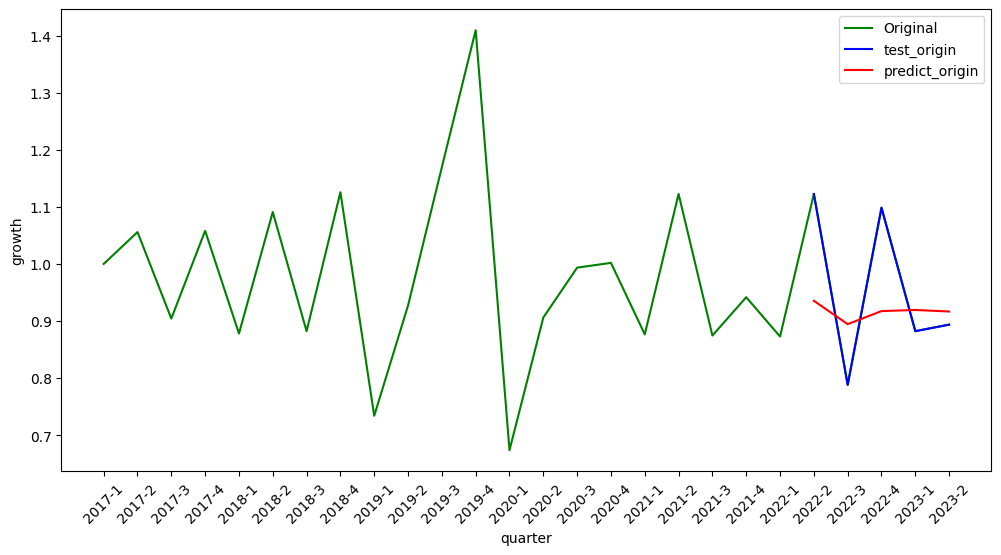

In [142]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_bread['분기'], sin_bread['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [143]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     0.040337
std      0.134919
min     -0.106239
25%     -0.037117
50%     -0.023022
75%      0.180974
max      0.187088
dtype: float64

In [144]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 22ms/step
[[0.31100774]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9026020169258118 


### 시장성

In [145]:
### X / y 데이터 생성
X = sin_bread[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_bread.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   2.890964e+09  1.000000 -1.754386
1   3.052271e+09  1.055797 -1.785714
2   2.760302e+09  0.904344 -5.660377
3   2.920501e+09  1.058037 -1.923077
4   2.564472e+09  0.878093 -4.000000
5   2.797392e+09  1.090826  0.000000
6   2.467750e+09  0.882161 -4.166667
7   2.777500e+09  1.125519  4.000000
8   2.038968e+09  0.734102 -2.040816
9   1.890527e+09  0.927198  2.083333
10  2.210920e+09  1.169473 -6.976744
11  3.115956e+09  1.409348 -2.173913
12  2.099716e+09  0.673859 -2.380952
13  1.902610e+09  0.906127  0.000000
14  1.890282e+09  0.993521 -7.692308
15  1.893774e+09  1.001847  2.500000
16  1.660197e+09  0.876661  4.761905
17  1.863603e+09  1.122519 -2.380952
18  1.629930e+09  0.874612  2.380952
19  1.534870e+09  0.941678  4.347826
20  1.339750e+09  0.872875 -2.222222
21  1.503946e+09  1.122557  0.000000
22  1.185546e+09  0.788290  2.127660
23  1.302230e+09  1.098423  2.083333
24  1.848807e+09  0.882248 -3.541109
25  1.793800e+09  0.893696 -3.283660
-

In [146]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [147]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.34358589 0.28333356 0.33331685]
 [0.31509092 0.29889885 0.35398848]]


In [148]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [149]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [150]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size = 256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4421
Epoch 1: val_loss improved from inf to 0.42417, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.4421 - val_loss: 0.4242
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4281
Epoch 2: val_loss improved from 0.42417 to 0.40953, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.4281 - val_loss: 0.4095
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4146
Epoch 3: val_loss improved from 0.40953 to 0.39533, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.4146 - val_loss: 0.3953
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4016
Epoch 4: val_loss improved from 0.39533 to 0.38149, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.4016 - val_loss: 0.3815
Epoch 5/100
1/1 [=================

In [151]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.56258905]
 [0.47069982]
 [0.53742754]
 [0.5241347 ]
 [0.5387715 ]]


In [152]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_bread.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.538846,0.562589
2022-3,0.497337,0.470700
2022-4,0.510760,0.537428
2023-1,0.536462,0.524135
2023-2,0.523215,0.538772


In [153]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_bread.iloc[-len(pred):, 5].values       # 시장성이 sin_bread의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.538846,0.562589,-2.358745e+07,-22565508.0,-1.021943e+06
2022-3,0.497337,0.470700,-2.537408e+07,-26520564.0,1.146485e+06
2022-4,0.510760,0.537428,-2.479630e+07,-23648498.0,-1.147802e+06
2023-1,0.536462,0.524135,-2.369007e+07,-24220644.0,5.305780e+05
2023-2,0.523215,0.538772,-2.426023e+07,-23590652.0,-6.695800e+05


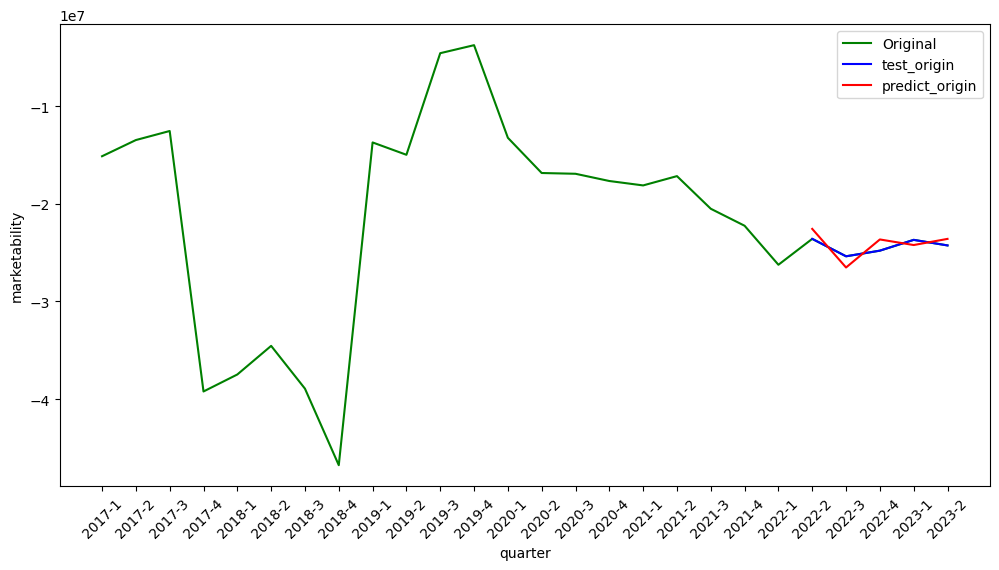

In [154]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_bread['분기'], sin_bread['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [155]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean    -2.324524e+05
std      1.016849e+06
min     -1.147802e+06
25%     -1.021943e+06
50%     -6.695800e+05
75%      5.305780e+05
max      1.146485e+06
dtype: float64

In [156]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 49ms/step
[[0.4613007]]
--------------------------------------------------------------------------------
예측된 시장성  : -26925116.0 


### 순점포증감률

In [157]:
### X / y 데이터 생성
X = sin_bread[['분기당_매출_금액', '성장성', '시장성']]
y = sin_bread.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   2.890964e+09  1.000000 -1.512043e+07
1   3.052271e+09  1.055797 -1.346181e+07
2   2.760302e+09  0.904344 -1.253366e+07
3   2.920501e+09  1.058037 -3.922756e+07
4   2.564472e+09  0.878093 -3.748623e+07
5   2.797392e+09  1.090826 -3.455381e+07
6   2.467750e+09  0.882161 -3.893855e+07
7   2.777500e+09  1.125519 -4.678023e+07
8   2.038968e+09  0.734102 -1.370530e+07
9   1.890527e+09  0.927198 -1.497230e+07
10  2.210920e+09  1.169473 -4.559885e+06
11  3.115956e+09  1.409348 -3.738650e+06
12  2.099716e+09  0.673859 -1.322979e+07
13  1.902610e+09  0.906127 -1.683951e+07
14  1.890282e+09  0.993521 -1.691733e+07
15  1.893774e+09  1.001847 -1.765891e+07
16  1.660197e+09  0.876661 -1.811092e+07
17  1.863603e+09  1.122519 -1.715825e+07
18  1.629930e+09  0.874612 -2.050279e+07
19  1.534870e+09  0.941678 -2.224422e+07
20  1.339750e+09  0.872875 -2.624218e+07
21  1.503946e+09  1.122557 -2.358745e+07
22  1.185546e+09  0.788290 -2.537408e+07
23  1.302230e+09

In [158]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [159]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.34358589 0.28333356 0.53646178]
 [0.31509092 0.29889885 0.52321491]]


In [160]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [161]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [162]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size = 256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2872
Epoch 1: val_loss improved from inf to 0.52112, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2872 - val_loss: 0.5211
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2752
Epoch 2: val_loss improved from 0.52112 to 0.50644, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.2752 - val_loss: 0.5064
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2637
Epoch 3: val_loss improved from 0.50644 to 0.49215, saving model to stock_model.h5
1/1 [==============================] - 0s 96ms/step - loss: 0.2637 - val_loss: 0.4922
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2527
Epoch 4: val_loss improved from 0.49215 to 0.47820, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.2527 - val_loss: 0.4782
Epoch 5/100
1/1 [=================

In [163]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 789ms/step
[[0.3471855 ]
 [0.33656773]
 [0.34896675]
 [0.30582848]
 [0.36146083]]


In [164]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_bread.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.617647,0.347185
2022-3,0.788486,0.336568
2022-4,0.784926,0.348967
2023-1,0.333317,0.305828
2023-2,0.353988,0.361461


In [165]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_bread.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_bread의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.617647,0.347185,0.000000,-3.368386,3.368386
2022-3,0.788486,0.336568,2.127660,-3.500622,5.628281
2022-4,0.784926,0.348967,2.083333,-3.346202,5.429535
2023-1,0.333317,0.305828,-3.541109,-3.883455,0.342346
2023-2,0.353988,0.361461,-3.283660,-3.190598,-0.093062


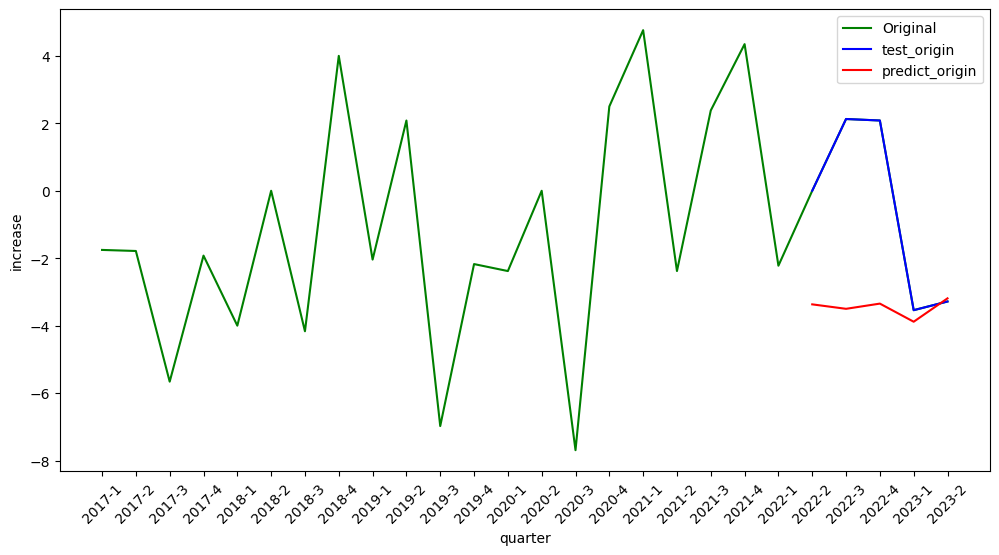

In [166]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_bread['분기'], sin_bread['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [167]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     2.935097
std      2.718240
min     -0.093062
25%      0.342346
50%      3.368386
75%      5.429535
max      5.628281
dtype: float64

In [168]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 23ms/step
[[0.38972503]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -2.8385891914367676 


### 추가

In [169]:
sin_bread.loc[26] = ['2023-3', '제과점', sales, growth, increase, marketability]

<ipython-input-169-755c04b139cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_bread.loc[26] = ['2023-3', '제과점', sales, growth, increase, marketability]


In [170]:
sin_bread

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,제과점,2.890964e+09,1.000000,-1.754386,-1.512043e+07
1,2017-2,제과점,3.052271e+09,1.055797,-1.785714,-1.346181e+07
2,2017-3,제과점,2.760302e+09,0.904344,-5.660377,-1.253366e+07
3,2017-4,제과점,2.920501e+09,1.058037,-1.923077,-3.922756e+07
4,2018-1,제과점,2.564472e+09,0.878093,-4.000000,-3.748623e+07
5,2018-2,제과점,2.797392e+09,1.090826,0.000000,-3.455381e+07
6,2018-3,제과점,2.467750e+09,0.882161,-4.166667,-3.893855e+07
7,2018-4,제과점,2.777500e+09,1.125519,4.000000,-4.678023e+07
8,2019-1,제과점,2.038968e+09,0.734102,-2.040816,-1.370530e+07
9,2019-2,제과점,1.890527e+09,0.927198,2.083333,-1.497230e+07


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [171]:
### X / y 데이터 생성
X = sin_bread[['성장성', '시장성', '순점포증감률']]
y = sin_bread.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.512043e+07 -1.754386
1   1.055797 -1.346181e+07 -1.785714
2   0.904344 -1.253366e+07 -5.660377
3   1.058037 -3.922756e+07 -1.923077
4   0.878093 -3.748623e+07 -4.000000
5   1.090826 -3.455381e+07  0.000000
6   0.882161 -3.893855e+07 -4.166667
7   1.125519 -4.678023e+07  4.000000
8   0.734102 -1.370530e+07 -2.040816
9   0.927198 -1.497230e+07  2.083333
10  1.169473 -4.559885e+06 -6.976744
11  1.409348 -3.738650e+06 -2.173913
12  0.673859 -1.322979e+07 -2.380952
13  0.906127 -1.683951e+07  0.000000
14  0.993521 -1.691733e+07 -7.692308
15  1.001847 -1.765891e+07  2.500000
16  0.876661 -1.811092e+07  4.761905
17  1.122519 -1.715825e+07 -2.380952
18  0.874612 -2.050279e+07  2.380952
19  0.941678 -2.224422e+07  4.347826
20  0.872875 -2.624218e+07 -2.222222
21  1.122557 -2.358745e+07  0.000000
22  0.788290 -2.537408e+07  2.127660
23  1.098423 -2.479630e+07  2.083333
24  0.882248 -2.369007e+07 -3.541109
25  0.893696 -2.426023e+07 -3.283660
2

In [172]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [173]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.29889885 0.52321491 0.35398848]
 [0.31100782 0.46130073 0.38972504]]


In [174]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [175]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [176]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size = 256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.5221
Epoch 1: val_loss improved from inf to 0.08304, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.5221 - val_loss: 0.0830
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.5057
Epoch 2: val_loss improved from 0.08304 to 0.07639, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.5057 - val_loss: 0.0764
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4899
Epoch 3: val_loss improved from 0.07639 to 0.07017, saving model to stock_model.h5
1/1 [==============================] - 0s 79ms/step - loss: 0.4899 - val_loss: 0.0702
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4746
Epoch 4: val_loss improved from 0.07017 to 0.06432, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.4746 - val_loss: 0.0643
Epoch 5/100
1/1 [=================

In [177]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 804ms/step
[[0.22711405]
 [0.2517286 ]
 [0.24948683]
 [0.2468417 ]
 [0.20391904]]


In [178]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_bread.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.000000,0.227114
2022-4,0.060445,0.251729
2023-1,0.343586,0.249487
2023-2,0.315091,0.246842
2023-3,0.220339,0.203919


In [179]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_bread.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_bread의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.000000,0.227114,1.185546e+09,1.623969e+09,-438423188.0
2022-4,0.060445,0.251729,1.302230e+09,1.671485e+09,-369254835.0
2023-1,0.343586,0.249487,1.848807e+09,1.667158e+09,181649792.0
2023-2,0.315091,0.246842,1.793800e+09,1.662051e+09,131748992.0
2023-3,0.220339,0.203919,1.610890e+09,1.579193e+09,31696640.0


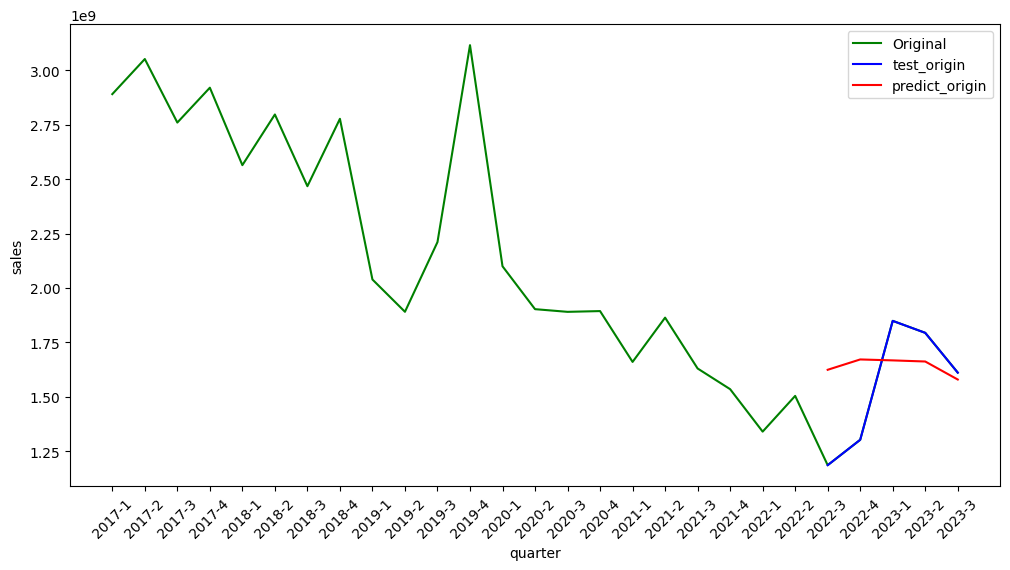

In [180]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_bread['분기'], sin_bread['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [181]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean    -9.251652e+07
std      2.903130e+08
min     -4.384232e+08
25%     -3.692548e+08
50%      3.169664e+07
75%      1.317490e+08
max      1.816498e+08
dtype: float64

In [182]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 23ms/step
[[0.20587409]]
--------------------------------------------------------------------------------
예측된 매출  : 1582967168.0 


### 성장성

In [183]:
X = sin_bread[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_bread.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   2.890964e+09 -1.512043e+07 -1.754386
1   3.052271e+09 -1.346181e+07 -1.785714
2   2.760302e+09 -1.253366e+07 -5.660377
3   2.920501e+09 -3.922756e+07 -1.923077
4   2.564472e+09 -3.748623e+07 -4.000000
5   2.797392e+09 -3.455381e+07  0.000000
6   2.467750e+09 -3.893855e+07 -4.166667
7   2.777500e+09 -4.678023e+07  4.000000
8   2.038968e+09 -1.370530e+07 -2.040816
9   1.890527e+09 -1.497230e+07  2.083333
10  2.210920e+09 -4.559885e+06 -6.976744
11  3.115956e+09 -3.738650e+06 -2.173913
12  2.099716e+09 -1.322979e+07 -2.380952
13  1.902610e+09 -1.683951e+07  0.000000
14  1.890282e+09 -1.691733e+07 -7.692308
15  1.893774e+09 -1.765891e+07  2.500000
16  1.660197e+09 -1.811092e+07  4.761905
17  1.863603e+09 -1.715825e+07 -2.380952
18  1.629930e+09 -2.050279e+07  2.380952
19  1.534870e+09 -2.224422e+07  4.347826
20  1.339750e+09 -2.624218e+07 -2.222222
21  1.503946e+09 -2.358745e+07  0.000000
22  1.185546e+09 -2.537408e+07  2.127660
23  1.302230e+09

In [184]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [185]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.31509092 0.52321491 0.35398848]
 [0.22033865 0.46130073 0.38972504]]


In [186]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [187]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [188]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size = 256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2705
Epoch 1: val_loss improved from inf to 0.20446, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.2705 - val_loss: 0.2045
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2589
Epoch 2: val_loss improved from 0.20446 to 0.19382, saving model to stock_model.h5
1/1 [==============================] - 0s 308ms/step - loss: 0.2589 - val_loss: 0.1938
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2477
Epoch 3: val_loss improved from 0.19382 to 0.18363, saving model to stock_model.h5
1/1 [==============================] - 0s 228ms/step - loss: 0.2477 - val_loss: 0.1836
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2371
Epoch 4: val_loss improved from 0.18363 to 0.17387, saving model to stock_model.h5
1/1 [==============================] - 0s 108ms/step - loss: 0.2371 - val_loss: 0.1739
Epoch 5/100
1/1 [==============

In [189]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 798ms/step
[[0.33906776]
 [0.37531573]
 [0.37861258]
 [0.3742224 ]
 [0.35106403]]


In [190]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_bread.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.155585,0.339068
2022-4,0.577254,0.375316
2023-1,0.283334,0.378613
2023-2,0.298899,0.374222
2023-3,0.311008,0.351064


In [191]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_bread.iloc[-len(pred):, 3].values       # 성장성이 sin_bread의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.155585,0.339068,0.788290,0.923240,-0.134950
2022-4,0.577254,0.375316,1.098423,0.949900,0.148523
2023-1,0.283334,0.378613,0.882248,0.952325,-0.070077
2023-2,0.298899,0.374222,0.893696,0.949096,-0.055400
2023-3,0.311008,0.351064,0.902602,0.932063,-0.029461


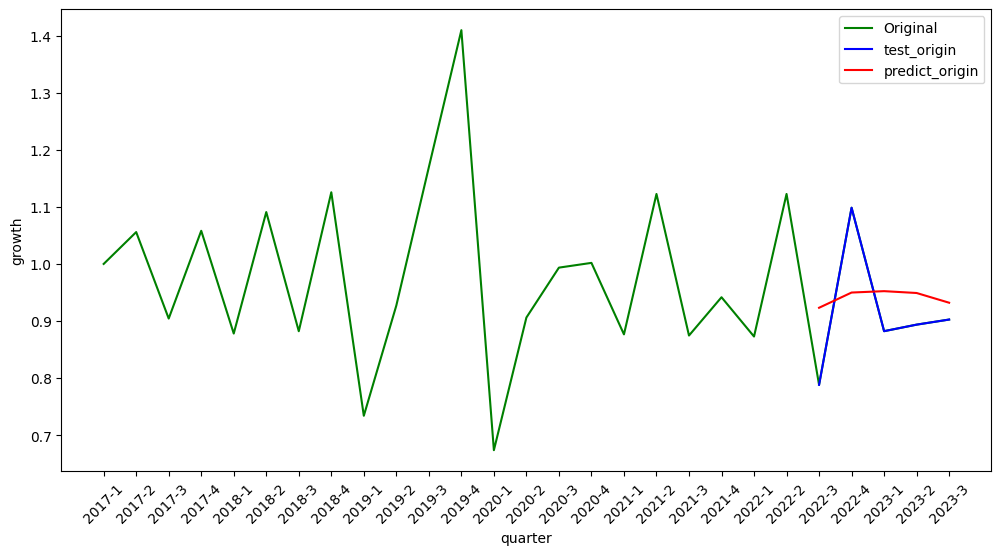

In [192]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_bread['분기'], sin_bread['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [193]:
### error의 요약 통계량
error.describe()

count    5.000000
mean    -0.028273
std      0.106209
min     -0.134950
25%     -0.070077
50%     -0.055400
75%     -0.029461
max      0.148523
dtype: float64

In [194]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 22ms/step
[[0.34382236]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9267367720603943 


###시장성

In [195]:
### X / y 데이터 생성
X = sin_bread[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_bread.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   2.890964e+09  1.000000 -1.754386
1   3.052271e+09  1.055797 -1.785714
2   2.760302e+09  0.904344 -5.660377
3   2.920501e+09  1.058037 -1.923077
4   2.564472e+09  0.878093 -4.000000
5   2.797392e+09  1.090826  0.000000
6   2.467750e+09  0.882161 -4.166667
7   2.777500e+09  1.125519  4.000000
8   2.038968e+09  0.734102 -2.040816
9   1.890527e+09  0.927198  2.083333
10  2.210920e+09  1.169473 -6.976744
11  3.115956e+09  1.409348 -2.173913
12  2.099716e+09  0.673859 -2.380952
13  1.902610e+09  0.906127  0.000000
14  1.890282e+09  0.993521 -7.692308
15  1.893774e+09  1.001847  2.500000
16  1.660197e+09  0.876661  4.761905
17  1.863603e+09  1.122519 -2.380952
18  1.629930e+09  0.874612  2.380952
19  1.534870e+09  0.941678  4.347826
20  1.339750e+09  0.872875 -2.222222
21  1.503946e+09  1.122557  0.000000
22  1.185546e+09  0.788290  2.127660
23  1.302230e+09  1.098423  2.083333
24  1.848807e+09  0.882248 -3.541109
25  1.793800e+09  0.893696 -3.283660
2

In [196]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [197]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.31509092 0.29889885 0.35398848]
 [0.22033865 0.31100782 0.38972504]]


In [198]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [199]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_29 (LSTM)              (None, 32)                12416     
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [200]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size = 256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.4494
Epoch 1: val_loss improved from inf to 0.39810, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.4494 - val_loss: 0.3981
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.4350
Epoch 2: val_loss improved from 0.39810 to 0.38438, saving model to stock_model.h5
1/1 [==============================] - 0s 112ms/step - loss: 0.4350 - val_loss: 0.3844
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4211
Epoch 3: val_loss improved from 0.38438 to 0.37107, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.4211 - val_loss: 0.3711
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4076
Epoch 4: val_loss improved from 0.37107 to 0.35811, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.4076 - val_loss: 0.3581
Epoch 5/100
1/1 [================

In [201]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 798ms/step
[[0.47519925]
 [0.54282767]
 [0.5256098 ]
 [0.54446197]
 [0.46911415]]


In [202]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_bread.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.497337,0.475199
2022-4,0.510760,0.542828
2023-1,0.536462,0.525610
2023-2,0.523215,0.544462
2023-3,0.461301,0.469114


In [203]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_bread.iloc[-len(pred):, 5].values       # 시장성이 sin_bread의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.497337,0.475199,-2.537408e+07,-26326900.0,9.528213e+05
2022-4,0.510760,0.542828,-2.479630e+07,-23416068.0,-1.380232e+06
2023-1,0.536462,0.525610,-2.369007e+07,-24157152.0,4.670860e+05
2023-2,0.523215,0.544462,-2.426023e+07,-23345726.0,-9.145060e+05
2023-3,0.461301,0.469114,-2.692512e+07,-26588812.0,-3.363040e+05


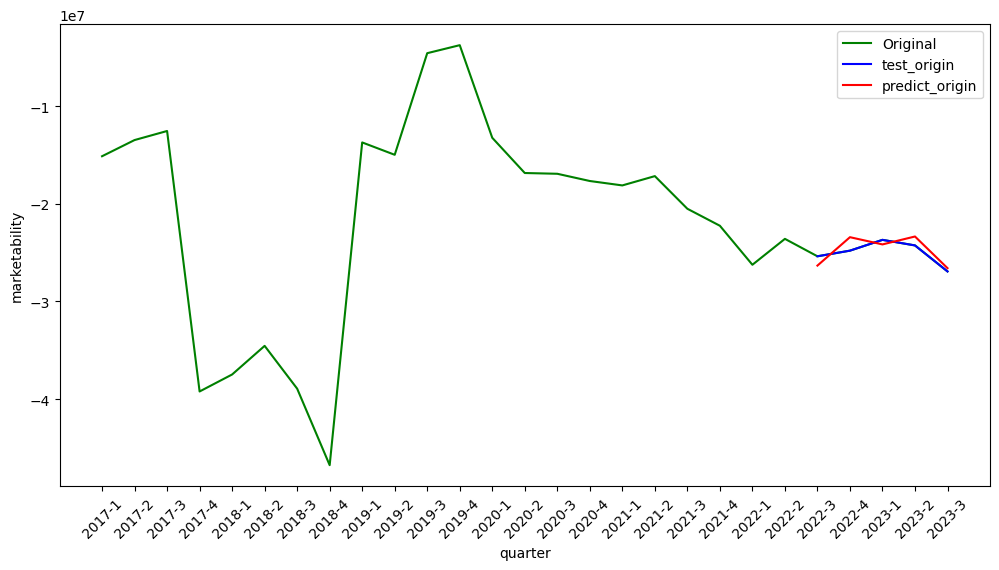

In [204]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_bread['분기'], sin_bread['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [205]:
### error의 요약 통계량
error.describe()

count    5.000000e+00
mean    -2.422269e+05
std      9.600950e+05
min     -1.380232e+06
25%     -9.145060e+05
50%     -3.363040e+05
75%      4.670860e+05
max      9.528213e+05
dtype: float64

In [206]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 34ms/step
[[0.46666616]]
--------------------------------------------------------------------------------
예측된 시장성  : -26694180.0 


### 순점포증감률

In [207]:
### X / y 데이터 생성
X = sin_bread[['분기당_매출_금액', '성장성', '시장성']]
y = sin_bread.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   2.890964e+09  1.000000 -1.512043e+07
1   3.052271e+09  1.055797 -1.346181e+07
2   2.760302e+09  0.904344 -1.253366e+07
3   2.920501e+09  1.058037 -3.922756e+07
4   2.564472e+09  0.878093 -3.748623e+07
5   2.797392e+09  1.090826 -3.455381e+07
6   2.467750e+09  0.882161 -3.893855e+07
7   2.777500e+09  1.125519 -4.678023e+07
8   2.038968e+09  0.734102 -1.370530e+07
9   1.890527e+09  0.927198 -1.497230e+07
10  2.210920e+09  1.169473 -4.559885e+06
11  3.115956e+09  1.409348 -3.738650e+06
12  2.099716e+09  0.673859 -1.322979e+07
13  1.902610e+09  0.906127 -1.683951e+07
14  1.890282e+09  0.993521 -1.691733e+07
15  1.893774e+09  1.001847 -1.765891e+07
16  1.660197e+09  0.876661 -1.811092e+07
17  1.863603e+09  1.122519 -1.715825e+07
18  1.629930e+09  0.874612 -2.050279e+07
19  1.534870e+09  0.941678 -2.224422e+07
20  1.339750e+09  0.872875 -2.624218e+07
21  1.503946e+09  1.122557 -2.358745e+07
22  1.185546e+09  0.788290 -2.537408e+07
23  1.302230e+09

In [208]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [209]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.31509092 0.29889885 0.52321491]
 [0.22033865 0.31100782 0.46130073]]


In [210]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [211]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [212]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size = 256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2989
Epoch 1: val_loss improved from inf to 0.51914, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.2989 - val_loss: 0.5191
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2862
Epoch 2: val_loss improved from 0.51914 to 0.50490, saving model to stock_model.h5
1/1 [==============================] - 0s 135ms/step - loss: 0.2862 - val_loss: 0.5049
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2741
Epoch 3: val_loss improved from 0.50490 to 0.49097, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.2741 - val_loss: 0.4910
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2624
Epoch 4: val_loss improved from 0.49097 to 0.47738, saving model to stock_model.h5
1/1 [==============================] - 0s 96ms/step - loss: 0.2624 - val_loss: 0.4774
Epoch 5/100
1/1 [================

In [213]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 769ms/step
[[0.3525359 ]
 [0.36692375]
 [0.3217271 ]
 [0.3791005 ]
 [0.40316713]]


In [214]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_bread.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.788486,0.352536
2022-4,0.784926,0.366924
2023-1,0.333317,0.321727
2023-2,0.353988,0.379101
2023-3,0.389725,0.403167


In [215]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_bread.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_bread의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.788486,0.352536,2.127660,-3.301751,5.429410
2022-4,0.784926,0.366924,2.083333,-3.122561,5.205895
2023-1,0.333317,0.321727,-3.541109,-3.685450,0.144341
2023-2,0.353988,0.379101,-3.283660,-2.970909,-0.312751
2023-3,0.389725,0.403167,-2.838589,-2.671179,-0.167411


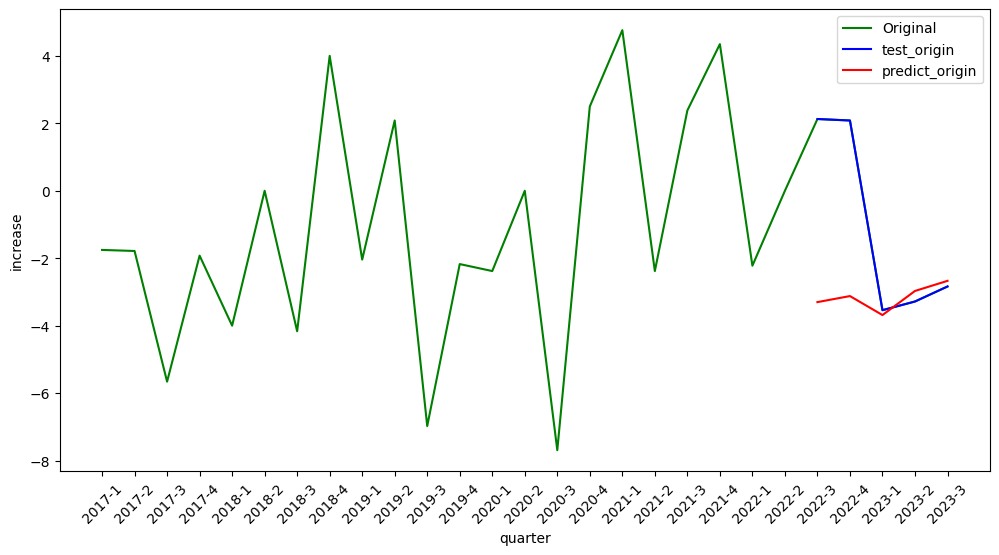

In [216]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_bread['분기'], sin_bread['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [217]:
### error의 요약 통계량
error.describe()

count    5.000000
mean     2.059897
std      2.979540
min     -0.312751
25%     -0.167411
50%      0.144341
75%      5.205895
max      5.429410
dtype: float64

In [218]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 37ms/step
[[0.38728172]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -2.869018793106079 


### 추가

In [219]:
sin_bread.loc[27] = ['2023-4', '제과점', sales, growth, increase, marketability]

<ipython-input-219-6dc2b26c2328>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_bread.loc[27] = ['2023-4', '제과점', sales, growth, increase, marketability]


In [220]:
final_sin_bread = sin_bread
final_sin_bread

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,제과점,2.890964e+09,1.000000,-1.754386,-1.512043e+07
1,2017-2,제과점,3.052271e+09,1.055797,-1.785714,-1.346181e+07
2,2017-3,제과점,2.760302e+09,0.904344,-5.660377,-1.253366e+07
3,2017-4,제과점,2.920501e+09,1.058037,-1.923077,-3.922756e+07
4,2018-1,제과점,2.564472e+09,0.878093,-4.000000,-3.748623e+07
5,2018-2,제과점,2.797392e+09,1.090826,0.000000,-3.455381e+07
6,2018-3,제과점,2.467750e+09,0.882161,-4.166667,-3.893855e+07
7,2018-4,제과점,2.777500e+09,1.125519,4.000000,-4.678023e+07
8,2019-1,제과점,2.038968e+09,0.734102,-2.040816,-1.370530e+07
9,2019-2,제과점,1.890527e+09,0.927198,2.083333,-1.497230e+07


## 최종결과

In [221]:
### X / y 데이터 생성
X = sin_bread[['성장성', '시장성', '순점포증감률']]
y = sin_bread.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -1.512043e+07 -1.754386
1   1.055797 -1.346181e+07 -1.785714
2   0.904344 -1.253366e+07 -5.660377
3   1.058037 -3.922756e+07 -1.923077
4   0.878093 -3.748623e+07 -4.000000
5   1.090826 -3.455381e+07  0.000000
6   0.882161 -3.893855e+07 -4.166667
7   1.125519 -4.678023e+07  4.000000
8   0.734102 -1.370530e+07 -2.040816
9   0.927198 -1.497230e+07  2.083333
10  1.169473 -4.559885e+06 -6.976744
11  1.409348 -3.738650e+06 -2.173913
12  0.673859 -1.322979e+07 -2.380952
13  0.906127 -1.683951e+07  0.000000
14  0.993521 -1.691733e+07 -7.692308
15  1.001847 -1.765891e+07  2.500000
16  0.876661 -1.811092e+07  4.761905
17  1.122519 -1.715825e+07 -2.380952
18  0.874612 -2.050279e+07  2.380952
19  0.941678 -2.224422e+07  4.347826
20  0.872875 -2.624218e+07 -2.222222
21  1.122557 -2.358745e+07  0.000000
22  0.788290 -2.537408e+07  2.127660
23  1.098423 -2.479630e+07  2.083333
24  0.882248 -2.369007e+07 -3.541109
25  0.893696 -2.426023e+07 -3.283660
2

In [222]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [223]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.31100782 0.46130073 0.38972504]
 [0.34382242 0.46666615 0.38728173]]


In [224]:
# 평가용 데이터 크기 설정
TEST_SIZE = 5

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (5, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (5, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (5, 1)


In [225]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [226]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size = 256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.5221
Epoch 1: val_loss improved from inf to 0.07384, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.5221 - val_loss: 0.0738
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.5057
Epoch 2: val_loss improved from 0.07384 to 0.06791, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.5057 - val_loss: 0.0679
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.4899
Epoch 3: val_loss improved from 0.06791 to 0.06238, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.4899 - val_loss: 0.0624
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.4746
Epoch 4: val_loss improved from 0.06238 to 0.05721, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.4746 - val_loss: 0.0572
Epoch 5/100
1/1 [=================

In [227]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 800ms/step
[[0.23279762]
 [0.23083673]
 [0.22816874]
 [0.1887388 ]
 [0.19060265]]


In [228]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_bread.iloc[-5:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.060445,0.232798
2023-1,0.343586,0.230837
2023-2,0.315091,0.228169
2023-3,0.220339,0.188739
2023-4,0.205874,0.190603


In [229]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_bread.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_bread의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.060445,0.232798,1.302230e+09,1.634941e+09,-332710323.0
2023-1,0.343586,0.230837,1.848807e+09,1.631155e+09,217652096.0
2023-2,0.315091,0.228169,1.793800e+09,1.626005e+09,167795456.0
2023-3,0.220339,0.188739,1.610890e+09,1.549889e+09,61000704.0
2023-4,0.205874,0.190603,1.582967e+09,1.553487e+09,29480320.0


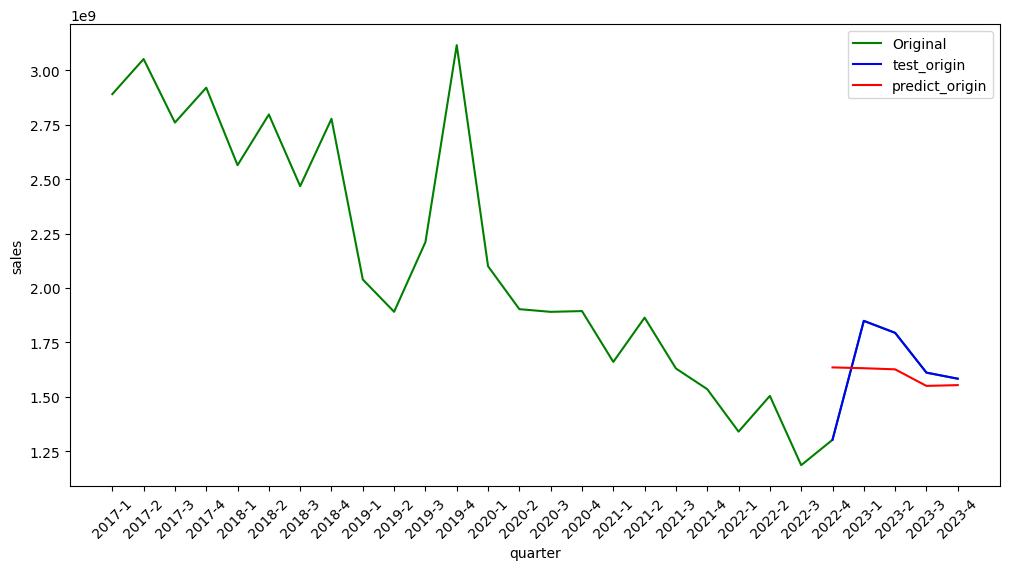

In [230]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_bread['분기'], sin_bread['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()